
# 1 Data Wrangling <a id='1_Data_Wrangling'></a>
---

## 1.1 Contents <a id='1.1_Contents'></a>

- [1 Data Wrangling](#1_Data_Wrangling)
    - [1.1 Contents](#1.1_Contents)
    - [1.2 Introduction](#1.2_Introduction)
    - [1.3 Importing](#1.3_Importing)
    - [1.4 Loading The Data](#1.4_Loading_the_data)
- [1.5 Preliminary Cleaning/Preparation](#1.5_Preliminary_exploration)
    - [1.5.1 Missing Values](#1.5.1_Missing_values)
    - [1.5.2 Correlation](#1.5.2_Correlation)
    - [1.5.3 Histograms](#1.5.3_Histograms)
    - [1.5.4 Duplicate Values](#1.5.4_Duplicate_values)
    - [1.5.5 Dropping Columns](#1.5.5_Dropping_columns)
    - [1.5.6 Imputation](#1.5.6_Imputation)
    - [1.5.7 Data Type Conversions](#1.5.7_Conversion)
    - [1.5.8 Misc Data Issues & Notes](#1.5.8_Data_Notes)
- [1.6 A Look Into Categorical Features](#1.6_Categorical_Features)
    - [1.6.1 Encoding](#1.6.1_Encoding)
- [1.7 A Look Into Numerical Features](#1.7_Numerical_Features) 
    - [1.7.1 Outliers](#1.7.1_Outliers)
    - [1.7.2 Normalization/Standardization](#1.7.2_Normalization_Standardization)
    - [1.7.3 Target Feature](#1.7.3_Target_Feature)
- [1.8 Save the Data](#1.8_Save_data)
- [1.9 Summary](#1.9_Summary)

## 1.2 Introduction <a id='1.2_Introduction'></a>

#### **Purpose:**
This notebook focuses on preliminary data cleaning, exploration and defining the initial predictive model goals. 

#### **Problem Statement:**

Develop a machine learning model to accurately predict fraudulent transactions with at least 90% precision and 85% recall, using transaction data and account balances, to reduce fraud detection errors.

## 1.3 Importing <a id='1.3_Importing'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

## 1.4 Loading The Data <a id='1.4_Loading_the_data'></a>

Data Source: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset

In [2]:
# Storing file path 
DataFilePath = "/Users/frankyaraujo/Development/Data_Science_Projects/Detecting_Bank_Fraud/data/raw"
# Storing filename
Filename = "/Fraud.csv"

# Load the data into DataFrame
BankData = pd.read_csv(DataFilePath+Filename, low_memory = False)

## 1.5 Preliminary Exploration <a id='1.5_Preliminary_exploration'></a>

In [3]:
# Overview of data columns, size and data types

BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [4]:
# Snippet of actual data to view the initial values 

BankData.head(20)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0      1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1      1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2      1  TRANSFER     181.00  C1305486145         181.00            0.00   
3      1  CASH_OUT     181.00   C840083671         181.00            0.00   
4      1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
5      1   PAYMENT    7817.71    C90045638       53860.00        46042.29   
6      1   PAYMENT    7107.77   C154988899      183195.00       176087.23   
7      1   PAYMENT    7861.64  C1912850431      176087.23       168225.59   
8      1   PAYMENT    4024.36  C1265012928        2671.00            0.00   
9      1     DEBIT    5337.77   C712410124       41720.00        36382.23   
10     1     DEBIT    9644.94  C1900366749        4465.00            0.00   
11     1   PAYMENT    3099.97   C249177573       20771.00        17671.03   
12     1   PAYMENT    2560.74  C1648232591        5070.00         2509.26   
13     1   PAYMENT   11633.76  C1716932897       10127.00            0.00   
14     1   PAYMENT    4098.78  C1026483832      503264.00       499165.22   
15     1  CASH_OUT  229133.94   C905080434       15325.00            0.00   
16     1   PAYMENT    1563.82   C761750706         450.00            0.00   
17     1   PAYMENT    1157.86  C1237762639       21156.00        19998.14   
18     1   PAYMENT     671.64  C2033524545       15123.00        14451.36   
19     1  TRANSFER  215310.30  C1670993182         705.00            0.00   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   M1979787155             0.0            0.00        0  
1   M2044282225             0.0            0.00        0  
2    C553264065             0.0            0.00        1  
3     C38997010         21182.0            0.00        1  
4   M1230701703             0.0            0.00        0  
5    M573487274             0.0            0.00        0  
6    M408069119             0.0            0.00        0  
7    M633326333             0.0            0.00        0  
8   M1176932104             0.0            0.00        0  
9    C195600860         41898.0        40348.79        0  
10   C997608398         10845.0       157982.12        0  
11  M2096539129             0.0            0.00        0  
12   M972865270             0.0            0.00        0  
13   M801569151             0.0            0.00        0  
14  M1635378213             0.0            0.00        0  
15   C476402209          5083.0        51513.44        0  
16  M1731217984             0.0            0.00        0  
17  M1877062907             0.0            0.00        0  
18   M473053293             0.0            0.00        0  
19  C1100439041         22425.0            0.00        0

##### Initial observations:
**Context**:

Data Column Dictionary:

- step - maps a unit of time in the real world. In this case 1 
step is 1 hour of time. Total steps 744 (30 days simulation).

- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
    - CASH-IN: Refers to the process of adding funds to an account or receiving money. This could involve depositing cash into a bank account, receiving funds through a digital wallet, or any other way of increasing the balance of an account.

    - CASH-OUT: Refers to the process of withdrawing money from an account. This could involve withdrawing cash from an ATM, transferring funds out of a digital wallet, or any other means of reducing the account balance.

    - DEBIT: A transaction that decreases the balance of an account, typically involving the use of a debit card, or it could refer to any deduction from a bank account or ledger (such as an expense or a withdrawal).

    - PAYMENT: A transfer of money from one party to another to settle a debt or complete a transaction. Payments can be made using various methods, including cash, credit or debit cards, bank transfers, or digital payments.

    - TRANSFER: The movement of funds from one account to another, which could involve different banks, institutions, or accounts. Transfers can be internal (within the same bank) or external (to a different bank or institution).

- amount - amount of the transaction in local currency.

- nameOrig - customer who started the transaction

- oldbalanceOrg - initial balance before the transaction

- newbalanceOrig - new balance after the transaction

- nameDest - customer who is the recipient of the transaction

- oldbalanceDest - initial balance recipient before the 
transaction. Note that there is not information for customers 
that start with M (Merchants).

- newbalanceDest - new balance recipient after the transaction. 
Note that there is not information for customers that start 
with M (Merchants).

- isFraud - This is the transactions made by the fraudulent 
agents inside the simulation. In this specific dataset the 
fraudulent behavior of the agents aims to profit by taking 
control or customers accounts and try to empty the funds by 
transferring to another account and then cashing out of the 
system.


### 1.5.1 Missing Values <a id='1.5.1_Missing_values'></a>

In [5]:
# The number of missing values per column

BankData.isna().sum()
BankDataMissing = pd.DataFrame(BankData.isna().sum())
BankDataMissing.columns = ['Total # of missing values']

In [6]:
# The percentage of missing values per column, sorted from highest to lowest

BankDataMissing['% of missing values'] = BankData.isna().sum().sort_values(ascending = False)/len(BankData.index)*100

In [7]:
# Number of missing values and percentages by column, sorted from highest to lowest

BankDataMissing.sort_values(by = "Total # of missing values", ascending = False)

Total # of missing values  % of missing values
step                                    0                  0.0
type                                    0                  0.0
amount                                  0                  0.0
nameOrig                                0                  0.0
oldbalanceOrg                           0                  0.0
newbalanceOrig                          0                  0.0
nameDest                                0                  0.0
oldbalanceDest                          0                  0.0
newbalanceDest                          0                  0.0
isFraud                                 0                  0.0

##### Notes on missing data

The dataset is synthetic and constructed without any missing values.

### 1.5.2 Correlation <a id='1.5.2_Correlation'></a>


In this section, the correlation between variables will be explored. 

In [8]:
# To begin, a correlation matrix will be generated

correlation_matrix = BankData.select_dtypes(include=['number']).corr()
correlation_matrix

step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   

                oldbalanceDest  newbalanceDest   isFraud  
step                  0.027665        0.025888  0.031578  
amount                0.294137        0.459304  0.076688  
oldbalanceOrg         0.066243        0.042029  0.010154  
newbalanceOrig        0.067812        0.041837 -0.008148  
oldbalanceDest        1.000000        0.976569 -0.005885  
newbalanceDest        0.976569        1.000000  0.000535  
isFraud              -0.005885        0.000535  1.000000

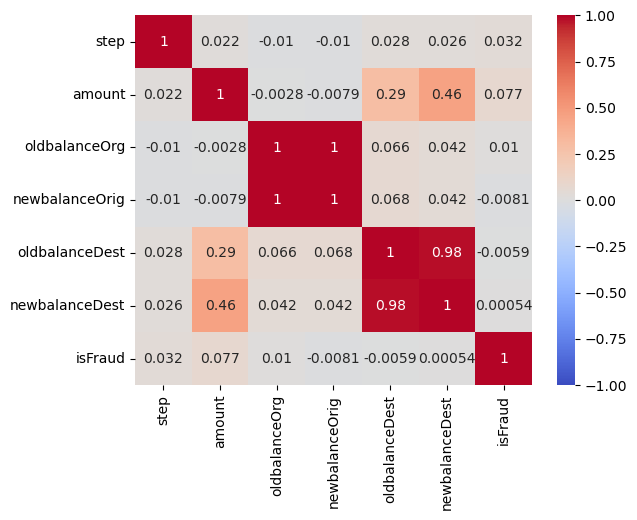

In [9]:
# To better visualize this, a heatmap will be used

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

- The correlation of 'isFraud' with other variables is quite low, with the highest correlation being with 'amount' at 0.076688. This indicates a weak positive correlation, suggesting that larger transaction amounts may slightly increase the likelihood of fraud, but the relationship is not strong.

- The correlations with other balance-related variables ('oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest') are very low (all below 0.01), indicating that these features do not have a significant linear relationship with the 'isFraud' variable.

- 'amount' has a moderate positive correlation with both 'oldbalanceDest' (0.294137) and 'newbalanceDest' (0.459304). This suggests that as the transaction amount increases, the balances in the destination account tend to increase as well, which is expected behavior. 'oldbalanceOrg' and 'newbalanceOrig' have a very high positive correlation (0.998803), which suggests that they are likely highly similar or derived from the same feature, meaning you might want to consider if both need to be retained in a model. 'oldbalanceDest' and 'newbalanceDest' also have a very high correlation (0.976569), which indicates redundancy in the data.

- Given the low correlation of most features with 'isFraud', it may be beneficial to explore additional features or data preprocessing techniques, such as creating interaction terms, transforming variables, or incorporating categorical features if applicable.

- The high correlations among balance variables suggest that we might want to drop one of the redundant features (e.g., either 'oldbalanceOrg' or 'newbalanceOrig', and similarly for 'oldbalanceDest' and 'newbalanceDest') to avoid multicollinearity.

### 1.5.3 Histograms <a id='1.5.3_Histograms'></a>

Before moving on, let's take a look at the distributions of the variables using histograms.

In [10]:
# Storing the DataFrame with numerical columns only for the histograms

numerical_data = BankData.select_dtypes(include=['number'])
numerical_data

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  
0                  0.00        0  
1                  0.00        0  
2                  0.00        1  
3                  0.00        1  
4                  0.00        0  
...                 ...      ...  
6362615       339682.13        1  
6362616            0.00        1  
6362617      6379898.11        1  
6362618            0.00        1  
6362619      7360101.63        1  

[6362620 rows x 7 columns]

In [11]:
# A function to remove outliers and plot histograms
def plot_histogram_without_outliers(variable_name):
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = numerical_data[variable_name].quantile(0.25)
    Q3 = numerical_data[variable_name].quantile(0.75)
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_data = numerical_data[(numerical_data[variable_name] >= lower_bound) & 
                                    (numerical_data[variable_name] <= upper_bound)]
    
    # Create the histogram without outliers
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_data[variable_name], bins=30, kde=False, color='skyblue')

    # Set the title and labels
    plt.title(f'Distribution of {variable_name} (Without Outliers)', fontsize=16)
    plt.xlabel(variable_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Set y-axis to logarithmic scale for better readability
    plt.yscale('log')

    # Show grid lines for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

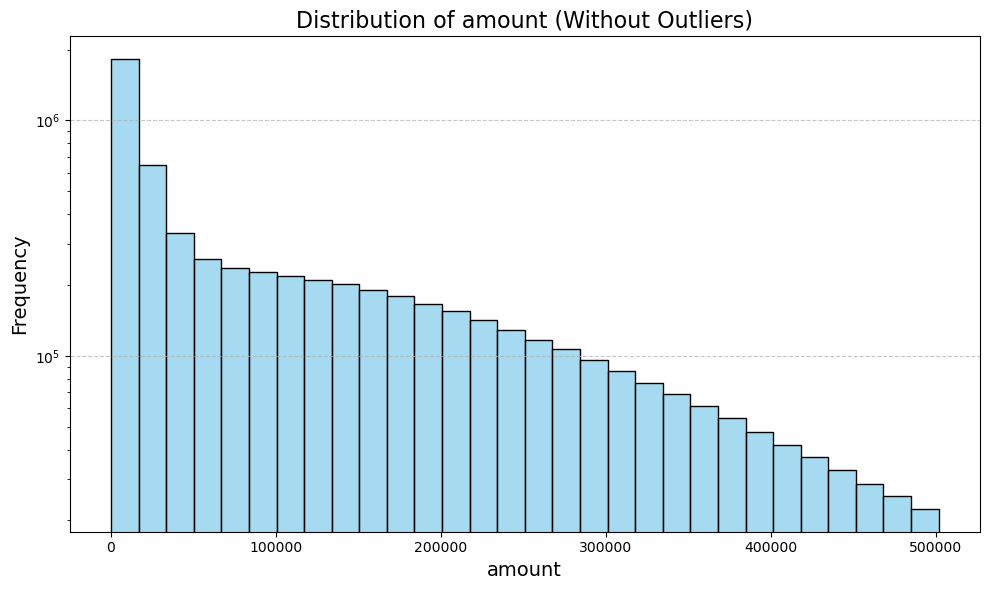

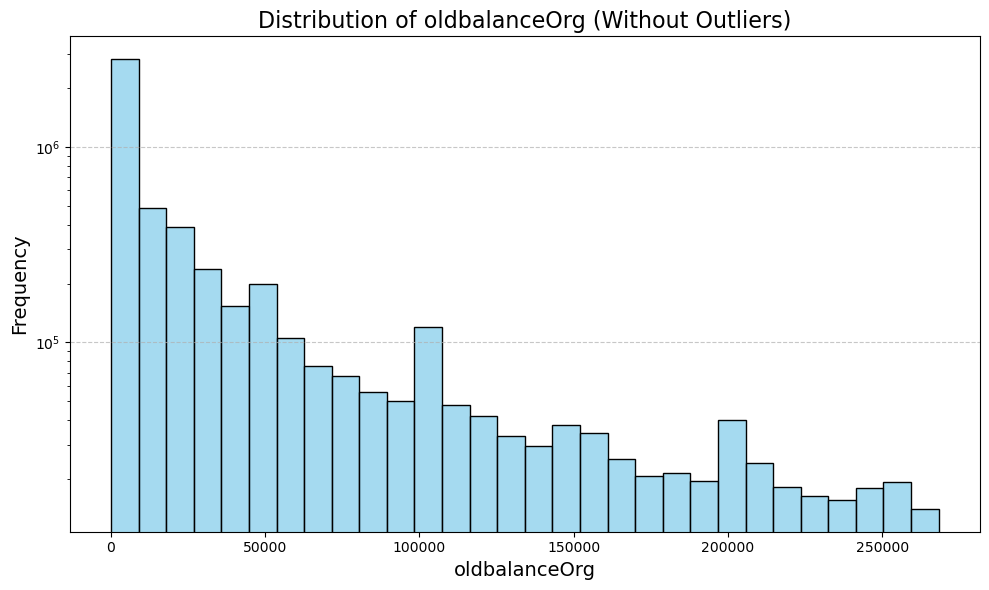

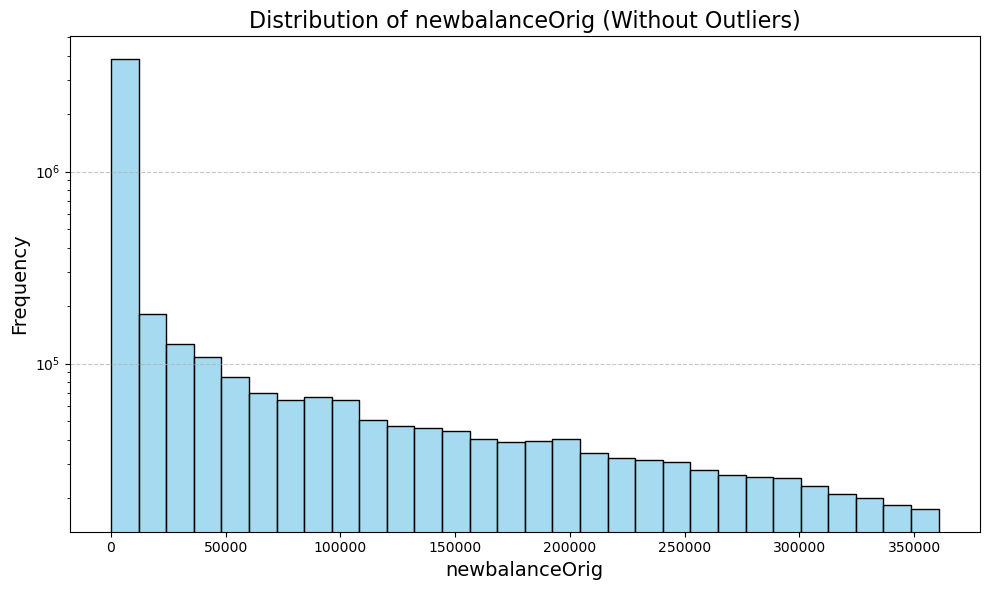

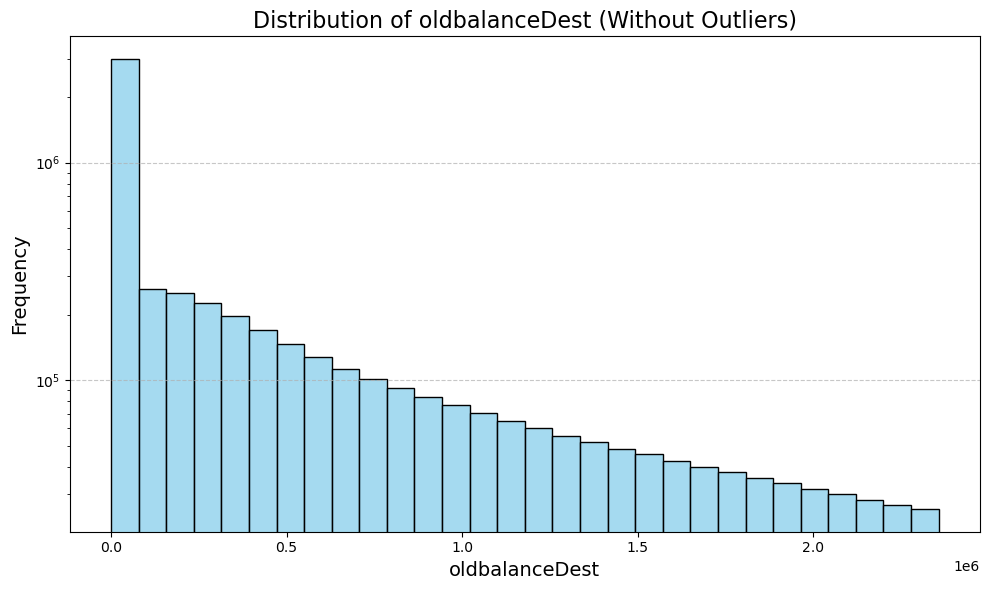

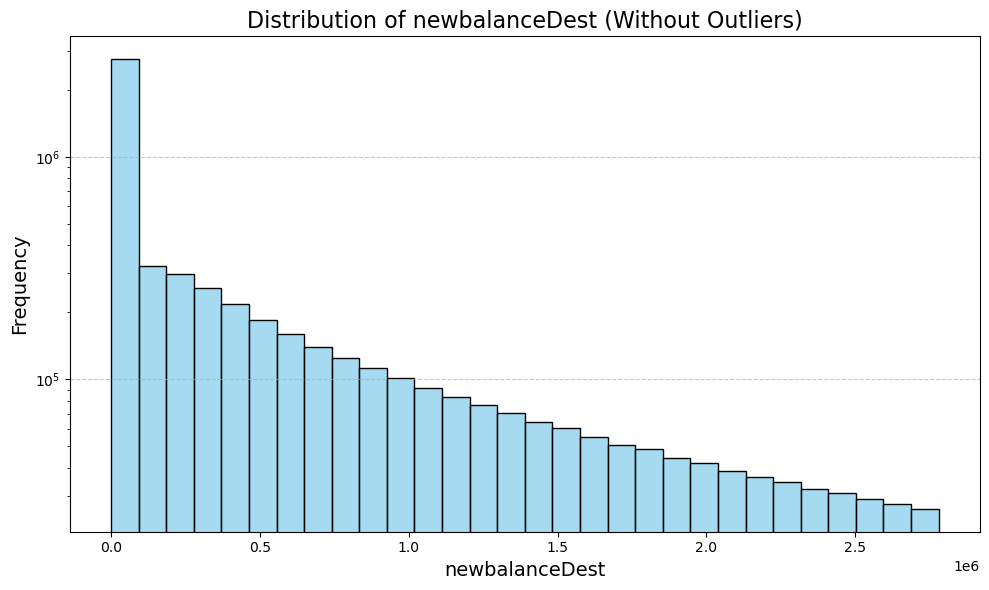

In [12]:
# Plot histograms for specified variables
for var in ['amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    plot_histogram_without_outliers(var)

- The histograms illustrate the distribution of transactions after filtering out outliers.

- The data exhibits a rightward skew, which indicates that while a significant portion of transactions is concentrated in smaller amounts, there are also transactions that reach much higher values, creating a long tail on the right side of the distribution.

- The tallest bars on the left represent the most frequent transaction amounts, suggesting that the majority of transactions fall within a lower range. This behavior is common in financial data, where everyday transactions are typically smaller.

- Although smaller amounts dominate the frequency, the presence of higher-value transactions, as illustrated by the tail, indicates a broad range in the dataset. This wide spread suggests that while the majority of transactions are relatively modest, a few large transactions significantly influence the overall distribution.

- The use of a logarithmic scale on the y-axis enhances our ability to visualize the frequency of smaller amounts while still accommodating the large values that would otherwise skew the representation of the data.

After conducting a preliminary analysis of the data through heatmaps and histograms, it's time to assess the necessary adjustments by examining duplicate values, data types, and any other potential issues

### 1.5.4 Duplicate Values <a id='1.5.4_Duplicate_values'></a>

In [13]:
# Brief look at potential duplicate obeservations
# Using .duplicated() and .sum() to find all duplicates, mark them as True, and sum the amount of True's 

BankData.duplicated(keep=False).sum()

0

Examining duplicates in the synthetic data, we find that there are none. It's essential to remember that real-world data may not be this straightforward, as it can vary significantly based on data collection, extraction, and other factors.

### 1.5.5 Dropping Columns <a id='1.5.5_Dropping_columns'></a>

Recall from the correlation review: 'The high correlations among balance variables suggest that we might want to drop one of the redundant features (e.g., either 'oldbalanceOrg' or 'newbalanceOrig'; similarly, we can apply this to 'oldbalanceDest' and 'newbalanceDest') to avoid multicollinearity.'

In this section, we will apply that suggestion to reduce redundancy and the amount of data being processed.

In [14]:
# 'newbalanceOrig' can be calculated using 'amount' and 'oldbalanceOrg' so this can be dropped now.

BankData.drop(columns='newbalanceOrig',inplace=True)

'oldbalanceDest' and 'newbalanceDest' need further analysis to determine if either can be dropped. These columns are more complex due to merchant transactions with limited data, but even zero values may still indicate potential fraud.

### 1.5.6 Imputation <a id='1.5.6_Imputation'></a>

N/A - There is no missing information in the synthetic dataset. 

### 1.5.7 Data Type Conversions <a id='1.5.7_Conversion'></a>

In [15]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 436.9+ MB


All columns are in the correct data type so need to convert at this time. 

### 1.5.8 Misc Data Issues & Notes <a id='1.5.8_Data_Notes'></a>

Just a note to consider — the 'oldbalanceDest' and 'newbalanceDest' columns don’t always reflect exact changes in the destination account balances. This will need further investigation to understand any discrepancies.

A few reasons why this may be:

1. Partial Transactions:
In some systems, not all transactions are reflected in account balances, or only part of the transaction is applied. This might happen if the system is processing fees, holds, or partial settlements.
2. Failed or Reversed Transactions:
Some transactions may be initiated but then fail or get reversed, causing a discrepancy between the actual transaction amount and the balance updates. In this case, the old and new balances may not reflect the full amount expected.
3. Pending Transactions:
The balances may not be updated in real time. In certain systems, there could be a lag or delay in when the transaction occurs and when the account balance is updated. This could lead to temporary discrepancies between the old and new balances.
4. Intermediary Accounts:
Some transactions may involve intermediary accounts (e.g., holding or clearing accounts) where the full amount is not reflected directly in the destination account. This can result in only partial or zero updates to the destination balance.
5. Merchant Transactions:
If you're dealing with merchant transactions, the destination balances could reflect more complex flows, such as split payments, transfers to multiple accounts, or partial refunds, which may not show in a simple subtraction between the old and new balance fields.
6. Fraudulent Transactions:
If fraud is involved, there may be deliberate tampering with balances to hide illegal activities. Fraudulent transactions can lead to anomalies in the recorded balances.
7. Transaction Fees:
The destination account balance might not change by the full amount due to transaction fees or deductions taken by the payment processor.
8. Currency Conversion:
If different currencies are involved, conversion rates could result in the destination balance being different than expected after a transaction.

## 1.6 A Look Into Categorical Features <a id='1.6_Categorical_Features'></a>

In [16]:
# Storing the DataFrame with categorical columns only for further exploration
categorical_data = BankData.select_dtypes(include=['object'])
categorical_data

type     nameOrig     nameDest
0         PAYMENT  C1231006815  M1979787155
1         PAYMENT  C1666544295  M2044282225
2        TRANSFER  C1305486145   C553264065
3        CASH_OUT   C840083671    C38997010
4         PAYMENT  C2048537720  M1230701703
...           ...          ...          ...
6362615  CASH_OUT   C786484425   C776919290
6362616  TRANSFER  C1529008245  C1881841831
6362617  CASH_OUT  C1162922333  C1365125890
6362618  TRANSFER  C1685995037  C2080388513
6362619  CASH_OUT  C1280323807   C873221189

[6362620 rows x 3 columns]

In [17]:
# a look into the unique values in the categorical variables
categorical_data.nunique()

type              5
nameOrig    6353307
nameDest    2722362
dtype: int64

The dataset contains three categorical columns with the following unique counts:

- type: This column has 5 unique transaction types.
- nameOrig: There are 6,353,307 unique origin account names, indicating that nearly every transaction comes from a different account.
- nameDest: There are 2,722,362 unique destination account names, suggesting that many accounts receive multiple transactions.

### 1.6.1 Encoding <a id='1.6.1_Encoding'></a>

Since there are only 5 types of transactions, the best approach for this variable would be 'One-Hot Encoding' or 'Labe Encoding'. Since 'nameOrig' and 'nameDest' have a high number of unique values, a more advanced technique would need to be applied which can be determined as the modelling approach is decided. 

## 1.7 A Look Into Numerical Features <a id='1.7_Numerical_Features'></a> 

In section 1.5.3, histograms were used to visualize and review the numerical features. This section serves as a continuation, providing a deeper exploration to better understand the information and gain further insights into the numerical data.

### 1.7.1 Outliers <a id='1.7.1_Outliers'></a>

In [18]:
# Drop 'step' and 'isFraud' columns
numerical_data_filtered = numerical_data.drop(columns=['step', 'isFraud'])

# Calculate Q1, Q3, and IQR
Q1 = numerical_data_filtered.quantile(0.25)
Q3 = numerical_data_filtered.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((numerical_data_filtered < lower_bound) | (numerical_data_filtered > upper_bound))

# Summarize the count of outliers per column
outliers_count = outliers.sum()

# Calculate the percentage of outliers
outliers_percentage = (outliers_count / len(numerical_data_filtered)) * 100

# Print out the percentage of outliers
print("Percentage of outliers per column:")
print(outliers_percentage)




Percentage of outliers per column:
amount             5.313503
oldbalanceOrg     17.485045
newbalanceOrig    16.555931
oldbalanceDest    12.355523
newbalanceDest    11.607278
dtype: float64


This analysis identified outliers in the numerical features of the dataset using the Interquartile Range (IQR) method. Outliers are values that fall significantly outside the expected range (below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR), and they are important for detecting extreme behaviors, such as potential fraud.

- oldbalanceOrg and newbalanceOrig have the highest percentage of outliers, suggesting large balance changes during transactions. These outliers may indicate significant events, such as large deposits or withdrawals, and should be explored further to determine whether they are consistent with expected behaviors or if they could signal potential fraud or unusual activity.

- amount also shows a noticeable percentage of outliers (5.31%). Depending on the analysis objective (e.g., fraud detection or identifying high-value transactions), these outliers might require closer inspection, as high transaction amounts could be pivotal in understanding patterns of fraud or large transfers.

- oldbalanceDest and newbalanceDest contain outliers in around 12% of the data. This suggests that certain destination accounts are showing extreme balance values, either high or low. These cases should be further investigated to understand the underlying cause of such large variations and determine if they align with typical transaction behavior.

### 1.7.2 Normalization/Standardization <a id='1.7.2_Normalization_Standardization'></a>

In [19]:
numerical_data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03  
std      3.399180e+06    3.674129e+06  3.590480e-02  
min      0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00

- Features like amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest have large differences in values. To make them comparable, consider normalizing (scaling between 0 and 1) or standardizing (scaling to a mean of 0) these features.


- Features like oldbalanceOrg and newbalanceOrig have many zeros. These could either mean no balance change or missing data. Check if these zeros are meaningful or if they need to be adjusted.

- Some features like amount and balances might be skewed (not symmetrical). A log transformation can help make the data more balanced and suitable for certain models.

- Handle Imbalanced Target (isFraud): The isFraud column is imbalanced (few fraud cases). This could affect how the model learns, so it’s important to adjust for this imbalance during model training.
    - The mean of 0.00129 suggests that the class of fraud (1) is very rare.

- Features like amount and balances have outliers (extreme values). These should be checked to decide whether they should be kept, adjusted, or removed based on their impact.

### 1.7.3 Target Feature <a id='1.7.3_Target_Feature'></a>

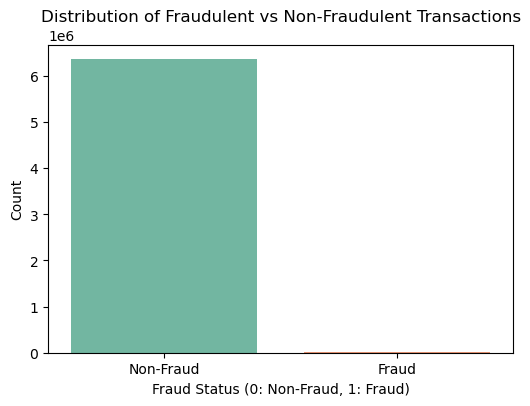

In [20]:
# Plotting the distribution of the 'isFraud' column
plt.figure(figsize=(6,4))
sns.countplot(data=BankData, x='isFraud', palette='Set2')

# Adding labels and title
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

The isFraud column shows very few fraud cases (1s) compared to non-fraud (0s).

Why this matters:
Imbalanced Classes: A dataset with such a low percentage of fraud cases (the minority class) can cause problems for most machine learning algorithms, which are biased towards predicting the majority class (non-fraudulent transactions). This can lead to poor model performance in identifying fraud.

Accuracy: A model that predicts only non-fraudulent transactions could still have high accuracy because of the large number of non-fraudulent cases. However, this would be misleading, as the model wouldn't actually be detecting fraud.
Evaluation Metrics: You would need to use metrics other than accuracy, such as precision, recall, F1-score, or AUC-ROC, which give more insight into how well the model is identifying fraud.

Potential Next Steps:

Given that isFraud is highly imbalanced, the following techniques will be considered:

- Resampling (e.g., SMOTE or undersampling) to balance the classes.
- Class weights in the model to give more importance to the fraud class.
- Use alternative evaluation metrics like precision, recall, F1-score, and AUC-ROC to get a more accurate picture of the model’s performance in detecting fraud.

## 1.8 Save the Data <a id='1.8_Save_data'></a>


In [23]:
# Storing file path 
OutputFilePath = "/Users/frankyaraujo/Development/Data_Science_Projects/Detecting_Bank_Fraud/data/interim"
# Storing filename
OutputFilename = "/Fraud_V2.csv"

# Save the DataFrame to CSV
BankData.to_csv(OutputFilePath + OutputFilename, index=False)

## 1.9 Summary <a id='1.9_Summary'></a>


In this notebook, we explored a dataset simulating fraudulent transactions and analyzed various features that contribute to detecting fraud. Here’s a summary of key findings and the next steps:

Data Overview
- The dataset includes five types of transactions: CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER, each representing different activities related to account balances.
- The dataset captures balances before and after transactions for both the origin and destination accounts, along with the transaction amount.
Fraud Detection: The target variable, isFraud, identifies fraudulent transactions, with a very small proportion of positive cases (fraudulent transactions), highlighting a class imbalance.

Feature Analysis
- The correlation between isFraud and other features, like amount, is low, indicating only a weak relationship. However, amount shows a moderate correlation with destination balances, suggesting that larger transactions tend to lead to higher balances in the destination accounts.
- High correlations between features like oldbalanceOrg and newbalanceOrig (0.9988) suggest redundancy, and similar correlations exist for oldbalanceDest and newbalanceDest. This redundancy may lead to multicollinearity, warranting the consideration of dropping some features during modeling.
- Outliers were detected using the IQR method. The most significant outliers appear in balance-related features and transaction amounts, potentially signaling significant events or fraudulent activities that need further investigation.
- The transaction amounts are right-skewed, with most transactions being small, but the presence of higher-value transactions creates a long tail. This skewness may require transformation (e.g., logarithmic scaling) to normalize the data for machine learning models.

Target Variable - isFraud
- The isFraud column shows a severe imbalance, with fraud cases constituting only about 0.13% of all transactions. This imbalance is a critical consideration for model development, as most algorithms tend to favor the majority class (non-fraudulent transactions).
- Due to the low occurrence of fraud cases, traditional evaluation metrics like accuracy are not sufficient. Alternative metrics such as precision, recall, F1-score, and AUC-ROC should be used to evaluate the model’s ability to detect fraud.

Potential Next Steps
- Given the severe imbalance in the isFraud class, techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling will be considered to balance the classes.
- Additional transformations may include handling zeros in balance features, log transformations to address skewness, and creating new features that capture interactions between existing variables.
- Redundant features, particularly those related to account balances (oldbalanceOrg, newbalanceOrig, etc.), may be dropped or combined to reduce multicollinearity and improve model performance.
- Outliers in transaction amounts and balances will be carefully evaluated to determine if they are valid extreme values or should be adjusted to enhance model robustness.
- The high imbalance of the target variable suggests that we should focus on models that can handle imbalanced data, such as decision trees or ensemble methods with adjusted class weights.

By addressing the class imbalance, outliers, and feature redundancies, and selecting appropriate evaluation metrics, we can develop a model that is better suited for detecting fraudulent transactions.